In [2]:
import os
import os2os
import featureExtractor
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from skimage.filters import threshold_otsu, threshold_local
from scipy.ndimage.measurements import label
from skimage.measure import regionprops

no DELF


In [3]:
examples = {}
examples['can'] = {"probe":"./examples/can/soda_can_2_1_35_crop.png","gallery":["./examples/can/00000-color.png","./examples/can/00824-color_crop.png"],"depth":["./examples/can/00000-depth.png","./examples/can/00824-depth.png"]}
examples['test'] = {"probe":"./examples/test/probe.png","gallery":["./examples/test/gallery.png"],"depth":["./examples/can/00000-depth.png"]}




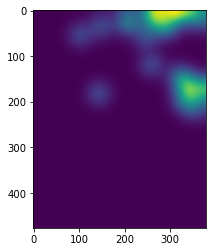

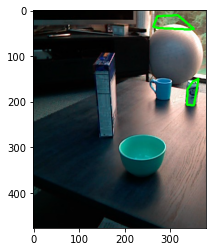

In [4]:
example_name = 'can'
depth_map = cv2.imread(examples[example_name]['depth'][-1],0)
image = cv2.imread(examples[example_name]['gallery'][-1])
#Perform the os2os projection
output,voteCoords,originalCoords,angles,scales,angles_g,scales_g = os2os.runOS2OSForFile(examples[example_name]['probe'],examples[example_name]['gallery'][-1],"./outputs",examples[example_name]['depth'][-1])
voteMap = output[0]
#Score the projections, including the image's depth map
object_locations, scores = os2os.os2osScoring(output[0],voteCoords,originalCoords,angles,scales,angles_g,scales_g,depth_map=depth_map)

plt.imshow(output[0])
plt.figure()
vis = os2os.drawObjects(image,object_locations)
plt.imshow(vis)